In [3]:
from belief_propagation import *
import numpy as np
from tqdm import tqdm


Define the graphical model we work on

In [4]:
ML_ratings = 'data/ratings.csv'
g_model = graph_model()
g_model.read_from_csv(ML_ratings, n_users_tokeep = 20) #n_users_to_keep determines the size of the graph we work on
g_model._graph.summary()

'IGRAPH UN-- 1787 2977 -- \n+ attr: name (v), ratings (e)'

First performing Loopy Belief Propagation (LBP)

In [20]:
k1 = 40 #Number of times we repeat the process
prop_strengths = [0.8,0.7,0.6,0.51,0.501,0.5001]
all_accuracies = np.zeros((k1, len(prop_strengths)))

j = 0
for prop_strength in tqdm(prop_strengths):
    accur = []
    for i in range(k1):
      lbp = LBP(g_model)
      prop = lbp.prop_strength
      lbp.set_labels()
      lbp.full_inference(N_iter = 5)
      accur.append([lbp.AUC_train_list[-1]])
    all_accuracies[:,j] = np.array(accur).flatten()
    j+=1
  

100%|██████████| 6/6 [01:21<00:00, 13.65s/it]


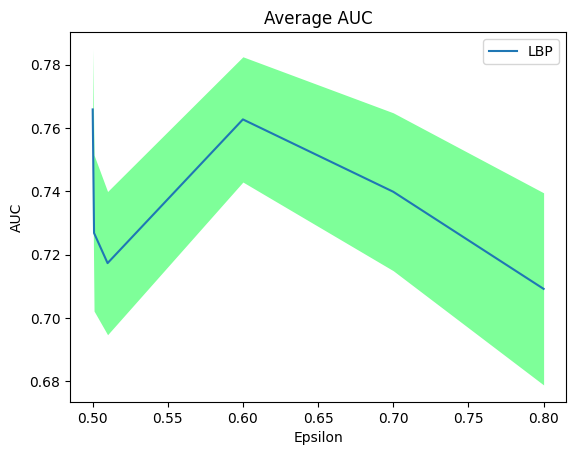

In [21]:
moyennes = np.mean(all_accuracies, axis = 0) 
sigmas = np.std(all_accuracies, axis = 0)/np.sqrt(k1)
plt.plot(prop_strengths, moyennes, label = 'LBP')
plt.fill_between(prop_strengths,moyennes-sigmas, moyennes+sigmas, alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',linewidth=0)
plt.xlabel('Epsilon')
plt.ylabel('AUC')
plt.title('Average AUC')
plt.legend()
plt.show()

In [ ]:
sbp_0 = SBP(g_model)
sbp_0.copy_labels(lbp.seed)

In [ ]:
k1 = 20
final_accs = []
prop_strength = 0.5001
for i in tqdm(range(k1)):
  lbp_0 = LBP(g_model)
  prop = lbp_0.prop_strength
  lbp_0.set_labels()
  lbp_0.full_inference(N_iter = 5)
  sbp_0 = SBP(g_model)
  sbp_0.copy_labels(lbp_0.seed)
  sbp_0.full_inference(N_iter = 10, N_iter_msg = 1)
  final_accs+=[(lbp_0.AUC_train_list[-1],sbp_0.AUC_train_list[-1],sbp_0.AUC_test_list[-1])]